In [11]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df1=pd.read_csv('C:\\Users\\win10\\Downloads\\Nutrient Composition Dataset (1).csv')

In [14]:
df1.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [15]:
df1.shape

(1746, 6)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No      1746 non-null   int64  
 1   Protein   1746 non-null   float64
 2   Fat       1746 non-null   float64
 3   vitaminC  1746 non-null   float64
 4   Fibre     1746 non-null   float64
 5   Product   1746 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 82.0+ KB


In [17]:
df1.describe()

,S.No,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000
mean,873.500000,0.922470,0.900091,0.900146,0.900830
std,504.171102,0.627128,0.634617,0.623847,0.626875
min,1.000000,0.000128,0.000267,0.000029,0.002579
25%,437.250000,0.435853,0.394784,0.419103,0.389124
50%,873.500000,0.813025,0.804687,0.796290,0.820783
75%,1309.750000,1.295106,1.298988,1.280870,1.295732
max,1746.000000,4.016890,3.979364,4.013322,3.570331


In [18]:
df=df1.drop(['S.No','Product'], axis=1)

In [19]:
df.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


In [20]:
from scipy.cluster.hierarchy import  dendrogram, linkage

In [21]:
ward_link=linkage(df,method='ward',)

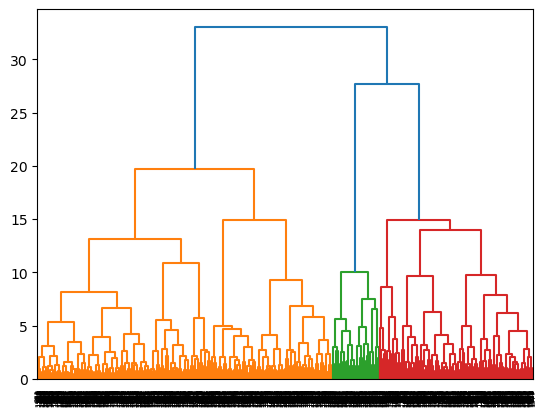

In [22]:
dend= dendrogram(ward_link)

In [23]:
from scipy.cluster.hierarchy import fcluster

In [24]:
clusters=fcluster(ward_link,3, criterion='maxclust')

In [25]:
clusters

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [26]:
df['Added_Cluster']= clusters

In [27]:
df.drop(['Nashat'],axis=1)

KeyError: "['Nashat'] not found in axis"

In [ ]:
df.head()

In [ ]:
pivot=pd.pivot_table(df,index="Added_Cluster")

In [ ]:
pivot

In [ ]:
df['Added_Cluster'].value_counts()

In [ ]:
df.to_csv('C:\\Users\\N. ali\\Desktop\\cluster.csv')

In [ ]:
data_df=pd.read_csv('C:\\Users\\N. ali\\Desktop\\Cust_Spend_Data_New.csv')

In [ ]:
data_df.head()

In [ ]:
data_df.isnull().sum()

In [ ]:
dups=data_df.duplicated()

In [ ]:
dups.sum()

In [ ]:
df=data_df.drop(['Cust_ID','Name'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SC=StandardScaler()

In [ ]:
std_data=SC.fit_transform(df)

In [ ]:
std_data

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmean_1=KMeans(n_clusters=1)

In [ ]:
kmean_1=kmean_1.fit(std_data)

In [ ]:
kmean_1.inertia_

In [ ]:
kmean_2=KMeans(n_clusters=2)
kmean_2=kmean_2.fit(std_data)
kmean_2.inertia_

In [ ]:
kmean_3=KMeans(n_clusters=3)
kmean_3=kmean_3.fit(std_data)
kmean_3.inertia_

In [ ]:
kmean_4=KMeans(n_clusters=4)
kmean_4=kmean_4.fit(std_data)
kmean_4.inertia_

In [ ]:
wss=[]

In [ ]:
for i in range(1,11):
    kmean_i=KMeans(n_clusters=i)
    kmean_i=kmean_i.fit(std_data)
    wss.append(kmean_i.inertia_)

In [ ]:
wss

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(range(1,11),wss)

# we decided to go for 3 clusters (2 is also fine)

In [ ]:
kmean_3=KMeans(n_clusters=3)
kmean_3=kmean_3.fit(std_data)

In [ ]:
label=kmean_3.labels_

In [ ]:
label

In [ ]:
df['clusters']=label

In [ ]:
df.head()

In [ ]:
pivot=pd.pivot_table(df,index='clusters')

In [ ]:
pivot

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [ ]:
silhouette_width = silhouette_samples(std_data,label)

In [ ]:
silhouette_sample